<a href="https://colab.research.google.com/github/sspaulc/Amazon_Book_Recommender/blob/main/Amazon_Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT:**

OBJECTIVE : 

The main objective is to create a machine learning model to recommend relevant books to users based on popularity and user interests.
In addition to the ML Model prediction, we also have taken into account the book recommendation for a totally new user.




# **WHAT ARE THE DIFFERENT TYPES OF RECOMMENDATIONS?**

There are basically three important types of recommendation engines:

Collaborative filtering

Content-Based Filtering

Hybrid Recommendation Systems

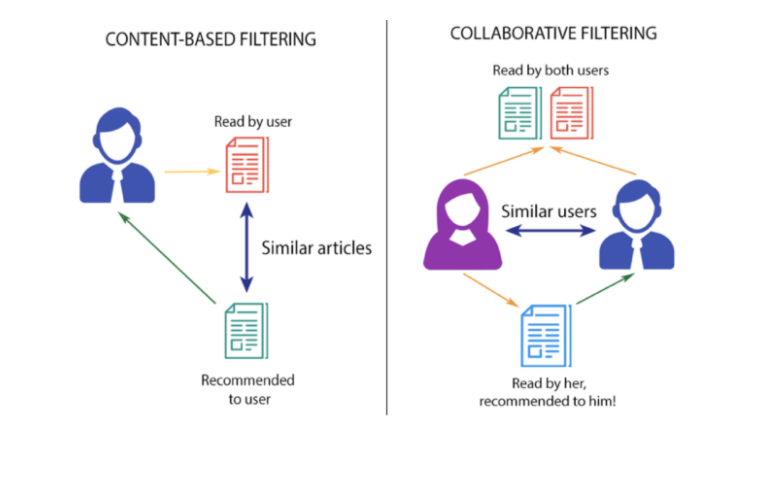

# **Data Collection:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#First data set consisting of users

user_df= pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/Users.csv")

In [ ]:
#Books 

books=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/Books.csv")


In [ ]:
#Ratings
ratings=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/Ratings.csv")


# **EDA:**

## Users:

In [ ]:
user_df.shape

(278858, 4)

In [ ]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
user_df['User-ID'].nunique()

278858

There aren't any duplicate values in User-Id, every user has been correctly made entry.

Country:

Retrieving country from Loacation:

In [ ]:
def country(x):
  x= x.split(",")
  word=x[-1]
  word=word[1:]
  return word

In [ ]:
user_df['Country']= user_df['Location'].apply(country)

In [ ]:
user_df.head(2)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa


In [ ]:
user_df['Country'].nunique()

708

There are 700 unique values in countries. Let us look at the ones that have most users.

In [ ]:
for item in user_df['Country'].unique():
  print(item)

usa
russia
portugal
united kingdom
canada
spain
australia
brazil

germany
mexico
china
italy
distrito federal
france
netherlands
iraq
finland
new zealand
india
ghana
switzerland
slovenia
iran
peru
bosnia and herzegovina
vietnam
sri lanka
pakistan
denmark
belgium
malaysia
u.a.e
turkey
philippines
greece
colombia
norway
kuwait
chile
quit
lj
taiwan
denmark"
españa
sweden
argentina
nigeria
london
bulgaria
austria
romania
singapore
albania
egypt
tunisia
uzbekistan
qatar
syria
saudi arabia
indonesia
sudan
somewherein space
poland
thailand
ireland
malaysia"
venezuela
paraguay
mozambique
morocco
afghanistan
estonia
clackamas
spain"
lesotho
yugoslavia
slovakia
costa rica
basque country
british virgin islands
ethiopia
croatia
united kingdom"
portugal"
israel
japan
israel"
iceland
the
south africa
iran"
cuba
antigua and barbuda
calabria
alderney
puerto rico
hong kong
nigeria"
latvia
jersey
germany"
luxembourg
belarus
cape verde"
lithuania
guyana
scotland
n/a
jordan
la argentina
angola
algeria
and

In [ ]:
user_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

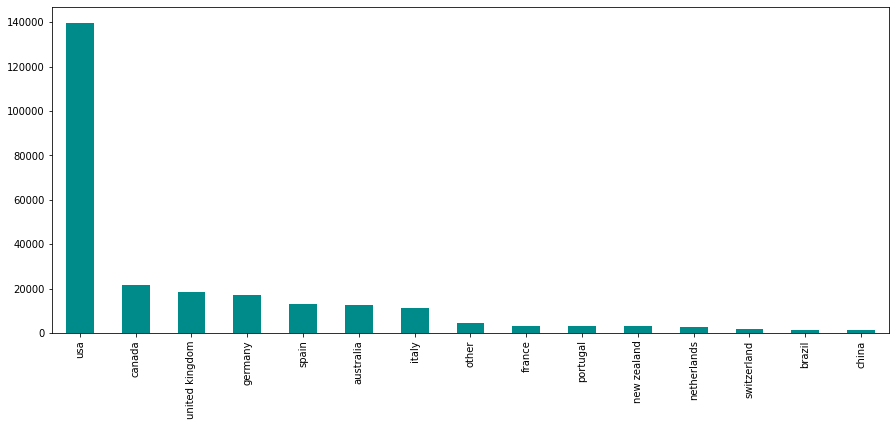

In [ ]:
plt.figure(figsize=(15,6))

user_df['Country'].value_counts().sort_values(ascending= False).head(15).plot(kind='bar',color='darkcyan')

Most users belong to USA.

In [ ]:
user_df.drop("Location",axis=1,inplace= True)

Age distribution:

Text(0.5, 1.0, 'Distribution of Age')

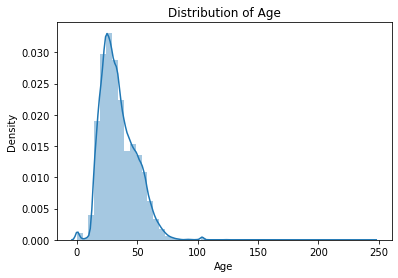

In [ ]:
sns.distplot(user_df['Age'])

plt.title("Distribution of Age")

Convert the outliers to values at extreme quartiles.

In [ ]:
#checking the outliers
Q1 = user_df['Age'].quantile(0.25)
Q3 = user_df['Age'].quantile(0.75)
IQR = Q3 - Q1

((user_df['Age'] < (Q1 - 1.5 * IQR)) | (user_df['Age'] > (Q3 + 1.5 * IQR))).sum()

1084

In [ ]:
#Changing the outliers

user_df['Age']=np.where(user_df['Age']<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(user_df['Age']>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),user_df['Age']))

In [ ]:
((user_df['Age'] < (Q1 - 1.5 * IQR)) | (user_df['Age'] > (Q3 + 1.5 * IQR))).sum()

0

No more outliers in age column.

Books:

In [ ]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


The most published Authors:

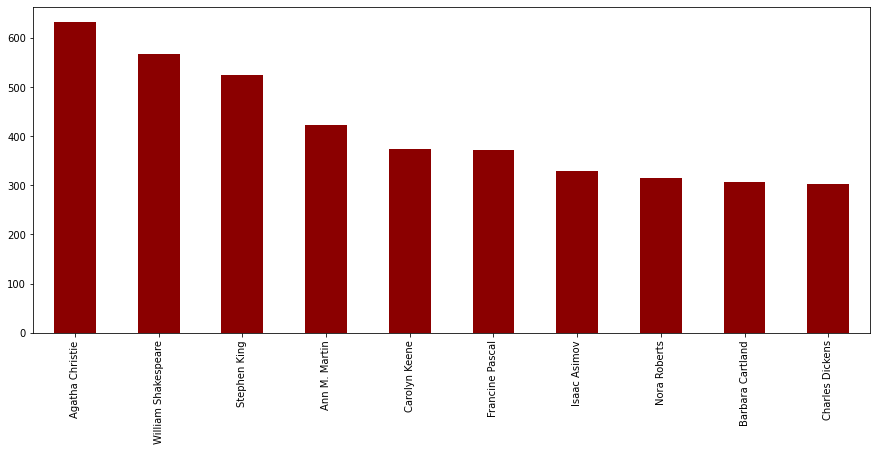

In [ ]:
plt.figure(figsize=(15,6))

books['Book-Author'].value_counts().sort_values(ascending= False).head(10).plot(kind='bar',color='darkred')

Agatha Christie, William Shakespeare and Stephen king has the most published books.

Let us look at the books published by these authors

In [ ]:
books= books.rename(columns={'Book-Title': 'Title', 'Book-Author':'Author'})

In [ ]:
books.columns

Index(['ISBN', 'Title', 'Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
books[books['Author']=='Agatha Christie'].Title

1855      Sleeping Murder (Miss Marple Mysteries (Paperb...
2012                                    A Caribbean Mystery
2355      Murder on the Orient Express (Hercule Poirot M...
2356      The Body in the Library (Miss Marple Mysteries...
2569                           Murder on the Orient Express
                                ...                        
270319                              Le couteau sur la nuque
270519                                        ENDLESS NIGHT
271094                             El Misterio De Sittaford
271095                                     Poirot en Egipto
271250    Murder at the Manor (Mystery Guild Lost Classi...
Name: Title, Length: 632, dtype: object

In [ ]:
books[books['Author']=='William Shakespeare'].Title

397               Julius Caesar (Oxford School Shakespeare)
1487                                   Othello (3rd Series)
2259                                              King Lear
2366                                                Othello
3327      The Tragedy of Hamlet Prince of Denmark (Signe...
                                ...                        
268275              Macbeth (The New Cambridge Shakespeare)
269378      Romeo and Juliet (Cambridge School Shakespeare)
269380    Macbeth: Shakespeare Made Easy (Shakespeare Ma...
269796    Antony and Cleopatra (Everyman Paperback Class...
271028     Romeo and Juliet (The New Cambridge Shakespeare)
Name: Title, Length: 567, dtype: object

In [ ]:
books[books['Author']=='Stephen King'].Title

126                           The Girl Who Loved Tom Gordon
229                                            Pet Sematary
346                                        Mientras Escribo
502                                             The Shining
881                                            Dreamcatcher
                                ...                        
266361                                  Los Ojos del Dragon
267402    Four Past Midnight (G K Hall Large Print Book ...
268214                                          Desperation
270899    Secret Windows: Essays and Fiction on the Craf...
271106               El Misterio De Salem's Lot/Salem's Lot
Name: Title, Length: 524, dtype: object

Publishers:

Text(0.5, 1.0, 'Most popular publishers')

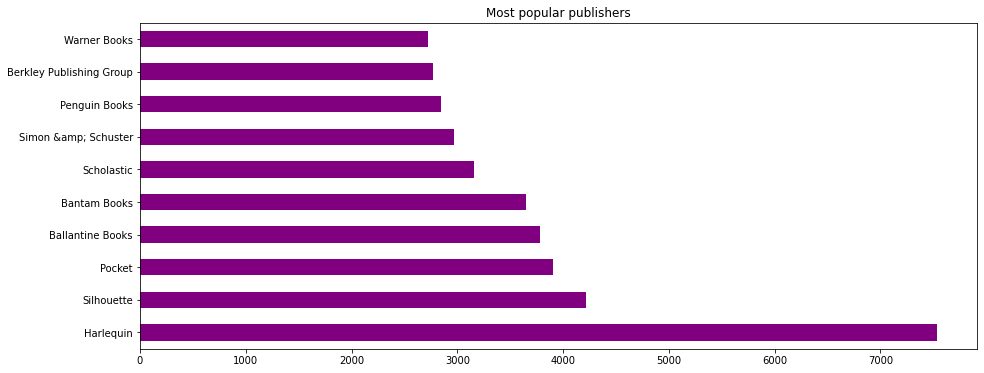

In [ ]:
plt.figure(figsize=(15,6))

books['Publisher'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh',color='purple')

plt.title('Most popular publishers')

Harlequin is the most popular publisher, followed by Silhouette.

Let us look at some of the titles of Harlequin

In [ ]:
books[books['Publisher']=='Harlequin'].Title.head(10)

269                                      Powder and Patch
999                      Rush to the Altar  (Twin Brides)
1002    The Virgin's Secret Marriage   The Brides Of H...
1013    On The Tycoon's Terms   Do Not Disturb! (Harle...
1014                    Sleeping Partners  (Nine to Five)
1245    Between The Sheets (Harlequin Temptation, No 607)
1458    My Big Fake Green-Card Wedding (Harlequin Amer...
1544                                    North Country Man
1545                                    The Farmer's Wife
1546          The Comeback Girl  (Those Sullivan Sisters)
Name: Title, dtype: object

Year of publication:

In [ ]:
books.columns

Index(['ISBN', 'Title', 'Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Two years have been wrongly classified. DK Publishing INC and Gallimard.

In [ ]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Title,Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Year has been incorrectly entered in Author and Publisher in Year..

In [ ]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

,ISBN,Title,Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Author,Book-Title
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,Michael Teitelbaum,"DK Readers: Creating the X-Men, How It All Beg..."
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN,James Buckley,"DK Readers: Creating the X-Men, How Comic Book..."


In [ ]:
#investigating the rows having 'Gallimard' as yearOfPublication
books[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Title,Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Author,Book-Title
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,NaN,NaN


In [ ]:

#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Title,Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Author,Book-Title
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,Jean-Marie Gustave Le ClÃ?Â©zio,"Peuple du ciel, suivi de 'Les Bergers"


In [ ]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'])

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


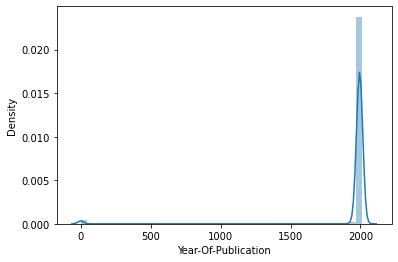

In [ ]:
sns.distplot(books['Year-Of-Publication'])

Converting outliers to extreme quartile values:

In [ ]:
#checking the outliers
Q1 = books['Year-Of-Publication'].quantile(0.25)
Q3 = books['Year-Of-Publication'].quantile(0.75)
IQR = Q3 - Q1

((books['Year-Of-Publication'] < (Q1 - 1.5 * IQR)) | (books['Year-Of-Publication'] > (Q3 + 1.5 * IQR))).sum()

9095

In [ ]:
#Changing the outliers

books['Year-Of-Publication']=np.where(books['Year-Of-Publication']<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(books['Year-Of-Publication']>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),books['Year-Of-Publication']))

In [ ]:
((books['Year-Of-Publication'] < (Q1 - 1.5 * IQR)) | (books['Year-Of-Publication'] > (Q3 + 1.5 * IQR))).sum()

0

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
#Check for nan values

books.isna().sum()

ISBN                   0
Title                  0
Author                 1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]
#two NaNs

,ISBN,Title,Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [ ]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [ ]:
#exploring 'Author' column
books.loc[books['Author'].isnull(),:]

,ISBN,Title,Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [ ]:
#Filling Nan of Book-Author with others
books['Author'].fillna('other',inplace=True)

Ratings:

In [ ]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


Ratings with only ISBN in books.

In [ ]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

Ratings with user id in user_df

In [ ]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(user_df['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


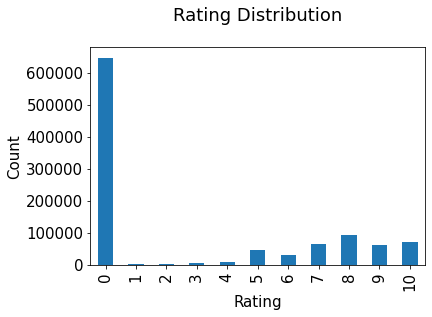

In [ ]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


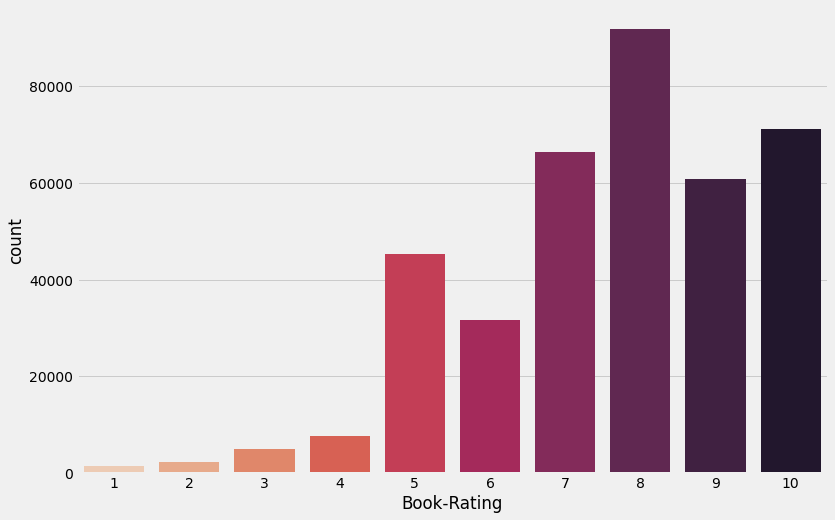

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

Grouping ISBN according to number of ratings given

In [ ]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


Getting information on the most rated books

In [ ]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Title,Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


Get Average Rating and number of rating of each book

In [ ]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [ ]:
#Get the final data set from explicit ratings,users and books
Final_Dataset=user_df.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [ ]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Title,Author,Year-Of-Publication,Publisher
0,8,NaN,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,NaN,n/a,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,NaN,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,NaN,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


Get the top books:

Top books should have ratings that are in the top 10% of number of ratings.

In [ ]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504765 , m=64.0


(38570, 11)

Applying weighted ratings to the top books:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


In [ ]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [157]:

user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [158]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 19.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617615 sha256=89aff8261f5d34e8b5afcb1c005810f2830d74854eb86d265a5a380109168e15
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


#Comparing SVD and NMF:

In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [133]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse     1.615103
test_mae      1.246618
fit_time     13.381464
test_time     1.076996
dtype: float64

In [134]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.515085
test_mae      2.103253
fit_time     25.928522
test_time     1.090690
dtype: float64

SVD performs better as eigen vectors with higher eigen values are given more importance.

In [135]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.612105000856012
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [136]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [141]:
predictions[0]

Prediction(uid=72214, iid='0684859300', r_ui=10.0, est=8.62542144203783, details={'was_impossible': False})

Make a dataset of predictions:

In [137]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
51074,197687,0671422901,6.0,7.614813,False,8.0,1.614813
5383,174304,0809125536,7.0,7.342896,False,7.0,0.342896
23939,217375,0440224764,8.0,7.297613,False,7.0,0.702387
38855,242465,0529033852,10.0,9.574829,False,10.0,0.425171
62950,76223,0786916052,7.0,7.810321,False,8.0,0.810321


Plotting the predicted ratings and actual ratings

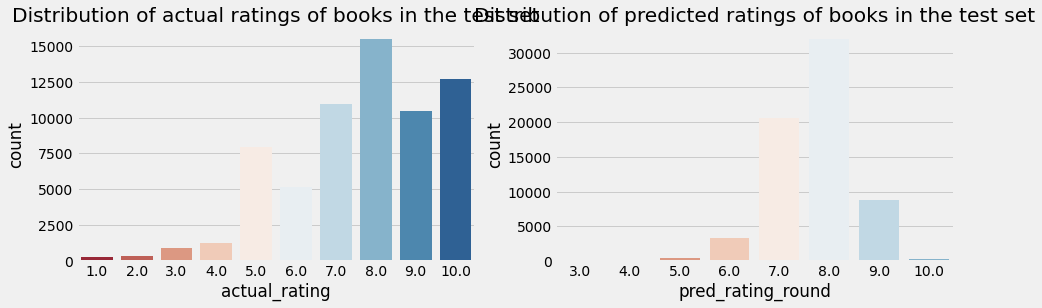

In [143]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

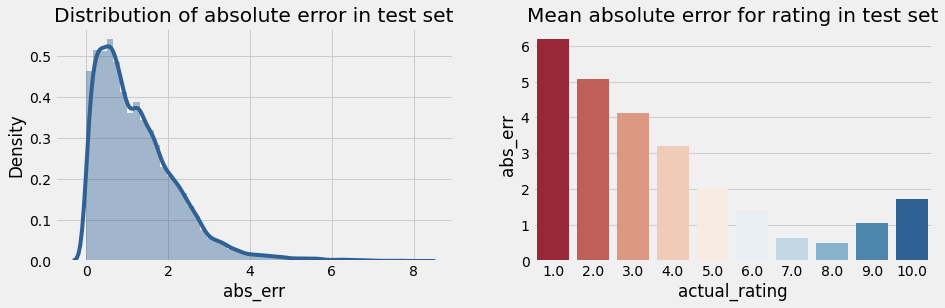

In [144]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()


In [146]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

In [151]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234921,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,NaN
234920,193458,0345342569,9,7.947368,19,Shoeless Joe,NaN
234893,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
234891,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,NaN
234894,193458,006447108X,9,8.833333,18,The Last Battle,NaN
234977,193458,0887309100,9,7.600000,5,The Dilbert Future: Thriving on Business Stupi...,NaN
234969,193458,0789404257,9,9.000000,4,Eyewitness Travel Guide to Italy (revised),NaN
234899,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN
234947,193458,0486204871,9,8.666667,3,The Devil's Dictionary,NaN
234918,193458,0330352695,9,7.615385,13,Four Letters of Love,NaN


In [148]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234890,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.476660
234959,193458,0671880314,9,8.305556,36,Schindler's List,7.984614
234892,193458,0064471063,9,8.518519,27,The Horse and His Boy,7.943824
234910,193458,031209261X,8,9.000000,4,Conduct Unbecoming,7.724493
234923,193458,034536743X,7,7.100000,10,The 158-Pound Marriage,7.720045


In [152]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234892,193458,0064471063,9,8.518519,27,The Horse and His Boy,7.943824
234890,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.476660
234959,193458,0671880314,9,8.305556,36,Schindler's List,7.984614
234958,193458,0671042858,8,7.063158,95,The Girl Who Loved Tom Gordon,6.980137
234898,193458,0140068236,8,8.000000,1,Nail on the Head,7.559504


In [153]:

from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [154]:
df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
21,276747,0943066433,7,7.000000,1
23,276747,1885408226,7,7.000000,1


In [160]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [161]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(18562, 13740)


ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006546684,0006547834,0006550576,0006550789,0006550924,0006551971,0006742939,0007110928,0007141076,0007154615,000716226X,0007170866,0020125305,0020125607,0020198817,0020198906,0020199600,002026478X,0020264801,0020306652,0020360754,002040400X,0020418809,0020427115,0020427859,0020442009,0020442106,0020442203,0020442300,0020442408,0020442505,...,8472236552,847223682X,8472237966,8477204055,8478447229,8478884459,8478884955,8478885196,8478886451,8483101610,8483140004,8484505294,8484602508,8495359537,8495501090,8495501198,8495501252,8495501465,849550152X,8495501651,8495618605,8804470895,8806142100,8806143042,880781210X,8807813025,8817106100,8838910170,8845205118,9074336329,9129622425,9500723549,9500723832,950491036X,9505156944,958704049X,9681500555,9681500954,9722016563,9871138148
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18562 13740


In [165]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [166]:
#checking first few rows
ratings_matrix.head(5)

ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006546684,0006547834,0006550576,0006550789,0006550924,0006551971,0006742939,0007110928,0007141076,0007154615,000716226X,0007170866,0020125305,0020125607,0020198817,0020198906,0020199600,002026478X,0020264801,0020306652,0020360754,002040400X,0020418809,0020427115,0020427859,0020442009,0020442106,0020442203,0020442300,0020442408,0020442505,...,8472236552,847223682X,8472237966,8477204055,8478447229,8478884459,8478884955,8478885196,8478886451,8483101610,8483140004,8484505294,8484602508,8495359537,8495501090,8495501198,8495501252,8495501465,849550152X,8495501651,8495618605,8804470895,8806142100,8806143042,880781210X,8807813025,8817106100,8838910170,8845205118,9074336329,9129622425,9500723549,9500723832,950491036X,9505156944,958704049X,9681500555,9681500954,9722016563,9871138148
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [171]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Author','Year-Of-Publication', 'Publisher']

In [172]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [173]:
#Drop nan
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [174]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [175]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [176]:

rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )

In [177]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [178]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


In [179]:
#range of rating
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


In [180]:
#Rating count populatrity
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [181]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


Drop duplicates:

In [182]:
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [183]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [184]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [187]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]]))


Recommendations for The Andromeda Strain:

1: The Terminal Man
2: Sphere
3: The Great Train Robbery
4: Airframe
5: Patriot Games


In [188]:
#pivot 
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [189]:
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,4 Blondes,50 Simple Things You Can Do to Save the Earth,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Clockwork Orange (Norton Paperback Fiction),A Cold Heart (Alex Delaware Novels (Paperback)),A Cold Heart: An Alex Delaware Novel,A Confederacy of Dunces,A Confederacy of Dunces (Evergreen Book),A Cry In The Night,A Cup of Tea (Ballantine Reader's Circle),A Dangerous Fortune,A Darkness More Than Night,A Day Late and a Dollar Short,A Density of Souls,A Fine Balance,"A Game of Thrones (A Song of Ice and Fire, Book 1)",A Girl Named Zippy: Growing Up Small in Mooreland Indiana (Today Show Book Club #3),A Great Deliverance,A Heartbreaking Work Of Staggering Genius : A Memoir Based on a True Story,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Kiss of Shadows (Meredith Gentry Novels (Paperback)),A Knight in Shining Armor,A Lesson Before Dying (Vintage Contemporaries (Paperback)),...,Wild Justice,Wild Mountain Thyme,Wild Swans: Three Daughters of China,Windmills of the Gods,Windy City Blues (V.I. Warshawski Novels (Paperback)),Wings,Winter Moon,Winter Prey,Winter Solstice,"Winter's Heart (The Wheel of Time, Book 9)",Winter's Tale,Wish You Well,Without Remorse,Witness in Death (Eve Dallas Mysteries (Paperback)),"Wizard and Glass (The Dark Tower, Book 4)","Wizard's First Rule (Sword of Truth, Book 1)",Wobegon Boy,Woman on the Edge of Time,Women Who Run with the Wolves,Women in His Life,Women of the Silk : A Novel,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",World of Pies : A Novel,Wouldn't Take Nothing for My Journey Now,Writ of Execution,Writing Down the Bones,Wuthering Heights,Wuthering Heights (Penguin Classics),Wuthering Heights (Wordsworth Classics),Xenocide (Ender Wiggins Saga (Paperback)),YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [190]:
us_canada_user_rating_pivot2.shape

(47994, 2444)

In [191]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

In [192]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [193]:
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

In [194]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("The Dead Zone")
print(coffey_hands)

1812


In [195]:
corr_coffey_hands  = corr[coffey_hands]

In [196]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['BAG OF BONES : A NOVEL',
 'Bag of Bones',
 'Black House',
 'Carrie',
 'Christine',
 'Cold Fire',
 'Cujo',
 'Darkfall',
 'Desperation',
 'Different Seasons',
 'Different Seasons (Signet)',
 'Dolores Claiborne',
 'Dragon Tears',
 'Dreamcatcher',
 "Everything's Eventual : 14 Dark Tales",
 'Eyes of the Dragon',
 'Four Past Midnight',
 "Gerald's Game",
 'Hearts In Atlantis',
 'Hearts In Atlantis : New Fiction',
 'Insomnia',
 'It',
 'Misery',
 'Needful Things',
 'Needful Things: The Last Castle Rock Story',
 'Nightmares &amp; Dreamscapes',
 'Pet Sematary',
 'Reliquary',
 'Rose Madder',
 'Skeleton Crew',
 'Stand',
 'The Bachman Books: Rage, the Long Walk, Roadwork, the Running Man',
 'The Bad Place',
 'The Dark Half',
 'The Drawing of the Three (The Dark Tower, Book 2)',
 'The Eyes of the Dragon',
 'The Green Mile: Coffey on the Mile (Green Mile Series)',
 "The Green Mile: Coffey's Hands (Green Mile Series)",
 'The Green Mile: Night Journey (Green Mile Series)',
 'The Green Mile: The Comple

In [197]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [198]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


In [199]:
#user interactions
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 20].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 3305


In [200]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 217729


In [201]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,242,0553278223,10,8.600,30
1,242,3150000335,10,8.000,3
2,242,3257203659,9,7.667,3
3,242,3257207522,10,10.000,1
4,242,3257208626,8,7.875,8
5,242,3257208634,10,10.000,1
6,242,3257208669,9,9.000,1
7,242,3257210450,10,10.000,1
8,242,3257212054,10,10.000,1
9,242,3257212429,10,10.000,1


In [202]:
import math

In [203]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 217729


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


In [204]:

from sklearn.model_selection import train_test_split



interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 174183
# interactions on Test set: 43546


In [205]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0001046438,000104687X,0001047973,000104799X,0001048082,0001053744,0001055607,0001056107,0001360469,0001374362,0001374869,000160418X,0001714600,0001845039,0001941941,0001941968,0001944711,0001953877,0001981625,0002000547,0002005018,0002005050,0002005557,0002006588,0002111314,0002116286,0002153572,0002154900,0002158973,0002163713,0002165368,0002166828,0002176181,0002176432,0002179695,0002181924,0002184974,0002197154,0002197286,0002198274,...,9993584185,9994256963,9994348337,9997405137,999740923X,9997410440,9997411757,9997411870,9997412958,999750805X,9997512952,9997555635,9998914140,B00001U0CP,B0000523SY,B00005B4LM,B00005N5J6,B00005TZWI,B00005U7YK,B00005UMI4,B00005UMK6,B0000633PU,B000063VMD,B00006CRTE,B00006I4OX,B00006RGIO,B00007FYKW,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000C2W5U,B0000T6KHI,B0000VZEH8,B0000VZEJQ,B00011SOXI,B00013AX9E,B0001FZGRQ,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
242,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
254,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
507,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
638,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
643,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [206]:

users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [207]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[242, 254, 507, 638, 643, 651, 709, 805, 882, 929]

In [208]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [209]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [210]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [211]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-6.06778934e-05, -5.12787688e-05, -6.06778934e-05, ...,
         1.95292627e-05,  3.53504596e-05,  2.55717531e-04],
       [ 1.34806521e-03,  1.13924727e-03,  1.34806521e-03, ...,
         3.01760139e-04,  5.03650756e-04,  8.82522631e-03],
       [-8.12469763e-04, -6.86616604e-04, -8.12469763e-04, ...,
         8.88547654e-05,  1.94929385e-04,  1.82673372e-03],
       ...,
       [ 6.13954189e-03,  5.18851482e-03,  6.13954189e-03, ...,
         7.65867580e-07, -3.08458912e-05,  1.55411336e-03],
       [-1.64557301e-03, -1.39067053e-03, -1.64557301e-03, ...,
         9.92332915e-05,  2.06616531e-04,  2.85384633e-03],
       [-7.30701927e-04, -6.17514766e-04, -7.30701927e-04, ...,
         3.47813033e-04,  8.31542621e-04,  4.16399817e-03]])

In [212]:

#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,242,254,507,638,643,651,709,805,882,929,1025,1131,1211,1248,1424,1435,1674,1733,1848,1903,2024,2030,2033,2110,2179,2276,2313,2358,2363,2766,2891,2977,3167,3282,3346,3363,3371,3373,3538,3556,...,275020,275111,275154,275220,275276,275383,275922,275970,276050,276165,276231,276307,276463,276498,276521,276538,276579,276641,276670,276680,276688,276847,276929,277157,277203,277427,277478,277523,277639,277929,277965,278026,278137,278188,278202,278221,278356,278418,278582,278633
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001046438,-0.000,0.001,-0.001,-0.004,-0.000,-0.000,-0.001,0.002,-0.001,-0.000,0.008,-0.002,-0.001,-0.000,0.008,0.002,-0.001,-0.001,-0.001,-0.000,-0.000,0.004,-0.005,-0.001,-0.002,-0.003,0.002,-0.000,-0.000,0.003,-0.002,-0.001,-0.002,-0.000,-0.001,-0.002,-0.001,-0.002,-0.000,-0.001,...,0.003,0.004,-0.002,-0.000,-0.001,-0.001,-0.001,0.001,0.009,-0.004,0.000,0.008,-0.001,-0.000,-0.000,-0.000,0.000,-0.001,-0.000,0.002,-0.000,0.000,0.000,-0.000,0.003,-0.004,-0.000,-0.001,-0.001,-0.000,-0.001,0.002,-0.002,-0.001,-0.000,-0.000,-0.002,0.006,-0.002,-0.001
000104687X,-0.000,0.001,-0.001,-0.003,-0.000,-0.000,-0.001,0.001,-0.001,-0.000,0.006,-0.002,-0.000,-0.000,0.007,0.002,-0.000,-0.001,-0.001,-0.000,-0.000,0.004,-0.004,-0.001,-0.001,-0.003,0.002,-0.000,-0.000,0.003,-0.002,-0.001,-0.001,-0.000,-0.001,-0.002,-0.001,-0.001,-0.000,-0.001,...,0.003,0.003,-0.001,-0.000,-0.000,-0.000,-0.001,0.001,0.008,-0.003,0.000,0.007,-0.001,-0.000,-0.000,-0.000,0.000,-0.001,-0.000,0.002,-0.000,0.000,0.000,-0.000,0.003,-0.003,-0.000,-0.001,-0.001,-0.000,-0.001,0.002,-0.001,-0.001,-0.000,-0.000,-0.001,0.005,-0.001,-0.001
0001047973,-0.000,0.001,-0.001,-0.004,-0.000,-0.000,-0.001,0.002,-0.001,-0.000,0.008,-0.002,-0.001,-0.000,0.008,0.002,-0.001,-0.001,-0.001,-0.000,-0.000,0.004,-0.005,-0.001,-0.002,-0.003,0.002,-0.000,-0.000,0.003,-0.002,-0.001,-0.002,-0.000,-0.001,-0.002,-0.001,-0.002,-0.000,-0.001,...,0.003,0.004,-0.002,-0.000,-0.001,-0.001,-0.001,0.001,0.009,-0.004,0.000,0.008,-0.001,-0.000,-0.000,-0.000,0.000,-0.001,-0.000,0.002,-0.000,0.000,0.000,-0.000,0.003,-0.004,-0.000,-0.001,-0.001,-0.000,-0.001,0.002,-0.002,-0.001,-0.000,-0.000,-0.002,0.006,-0.002,-0.001
000104799X,0.000,0.002,0.001,0.002,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.002,0.000,0.000,0.001,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.002,0.001,0.001,0.001,0.000,0.000,0.000,0.001,0.002,0.001,0.001,0.000,0.001,0.001,0.001,0.001,0.000,0.001,...,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.002,0.002,0.002,0.002,0.000,0.001,0.000,0.000,-0.000,0.000,0.001,0.001,0.001,0.000,-0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.001,-0.000,0.001,0.001,0.001,0.000,0.000,0.000,0.001,0.000,0.001,0.002
0001048082,-0.000,0.003,-0.000,-0.002,-0.000,-0.000,-0.000,0.002,-0.000,-0.000,0.007,-0.001,-0.000,-0.000,0.008,0.002,-0.000,-0.000,-0.000,-0.000,-0.000,0.004,-0.002,-0.000,-0.001,-0.001,0.002,-0.000,-0.000,0.004,-0.001,-0.000,-0.001,-0.000,-0.001,-0.001,-0.001,-0.001,-0.000,-0.000,...,0.003,0.003,-0.001,-0.000,-0.000,-0.000,-0.001,0.002,0.010,-0.001,0.002,0.008,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.003,-0.000,-0.000,0.000,-0.000,0.004,-0.002,-0.000,-0.001,-0.000,0.000,-0.000,0.003,-0.001,-0.000,-0.000,0.000,-0.001,0.007,-0.001,0.000


Collaborative Filtering:

In [213]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [214]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [215]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [216]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()



In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
